In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import csv
import seaborn as sns

In [2]:
#unemployment_csv_path= "./NJ_NY_PA_Unemployment_Data.csv"

excel_file = 'NJ_NY_PA_Unemployment_Data.xlsx'
unemployment= pd.read_excel(excel_file)


In [3]:
#Read the excel file

unemployment

,State,Month,Year,Unemployment Rate
0,PA,January,2019,4.0
1,PA,February,2019,3.9
2,PA,March,2019,3.9
3,PA,April,2019,3.8
4,PA,May,2019,3.8
...,...,...,...,...
81,NJ,January,2021,7.8
82,NJ,February,2021,7.8
83,NJ,March,2021,7.6
84,NJ,April,2021,7.5


In [4]:
unemployment.columns

Index(['State', 'Month ', 'Year', 'Unemployment Rate'], dtype='object')

In [5]:
column_names=unemployment.columns.tolist()

In [6]:
column_names[1]="Month"

In [7]:
#Reassign variable
unemployment.columns=column_names
column_names

['State', 'Month', 'Year', 'Unemployment Rate']

In [8]:
#Create a DataFrame for unemployment
unemployment_df=(unemployment)
unemployment_df

,State,Month,Year,Unemployment Rate
0,PA,January,2019,4.0
1,PA,February,2019,3.9
2,PA,March,2019,3.9
3,PA,April,2019,3.8
4,PA,May,2019,3.8
...,...,...,...,...
81,NJ,January,2021,7.8
82,NJ,February,2021,7.8
83,NJ,March,2021,7.6
84,NJ,April,2021,7.5


In [9]:
#Generate a summary statistics table of mean, median, variance,  standard deviation, and SEM of the rate for each state

mean=unemployment_df.groupby("State")["Unemployment Rate"].mean()
mean

State
NJ    6.793103
NY    6.971429
PA    7.203448
Name: Unemployment Rate, dtype: float64

In [10]:
mean=unemployment_df.groupby("Year")["Unemployment Rate"].mean()
mean

Year
2019    3.686111
2020    9.894286
2021    8.140000
Name: Unemployment Rate, dtype: float64

In [11]:
#Calculate the median
median=unemployment_df.groupby("State")["Unemployment Rate"].median()
median

State
NJ    3.8
NY    3.9
PA    4.0
Name: Unemployment Rate, dtype: float64

In [12]:
#Calculate the variance
variance=unemployment_df.groupby("State")["Unemployment Rate"].var()
variance

State
NJ    18.513522
NY    18.166561
PA    17.293202
Name: Unemployment Rate, dtype: float64

In [13]:
#Calculate the SEM

SEM=unemployment_df.groupby("State")["Unemployment Rate"].sem()
SEM

State
NJ    0.798998
NY    0.805485
PA    0.772216
Name: Unemployment Rate, dtype: float64

In [14]:
#Calculate the standard deviation

standard_dv=unemployment_df.groupby("State")["Unemployment Rate"].std()
standard_dv

State
NJ    4.302734
NY    4.262225
PA    4.158510
Name: Unemployment Rate, dtype: float64

In [15]:
summary_df=pd.DataFrame({"Mean":mean, "Median":median, "Variance": variance, "Standard Deviation": standard_dv, "SEM":SEM})
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
2019,3.686111,NaN,NaN,NaN,NaN
2020,9.894286,NaN,NaN,NaN,NaN
2021,8.140000,NaN,NaN,NaN,NaN
NJ,NaN,3.8,18.513522,4.302734,0.798998
NY,NaN,3.9,18.166561,4.262225,0.805485
PA,NaN,4.0,17.293202,4.158510,0.772216


In [16]:
unemployment.sort_values(by = 'Unemployment Rate', ascending=False).groupby(['State']).first()

,Month,Year,Unemployment Rate
State,,,
NJ,April,2020,16.5
NY,April,2020,16.2
PA,April,2020,16.2


In [17]:
unemployment.loc[unemployment['State']=='NJ'].sort_values(by= 'Unemployment Rate', ascending=False).head(1)

,State,Month,Year,Unemployment Rate
72,NJ,April,2020,16.5


In [18]:
unemployment.loc[unemployment['State']=='NY'].sort_values(by = 'Unemployment Rate', ascending=False).head(1)

,State,Month,Year,Unemployment Rate
44,NY,April,2020,16.2


In [19]:
unemployment.loc[unemployment['State']=='PA'].sort_values(by = 'Unemployment Rate', ascending=False).head(1)

,State,Month,Year,Unemployment Rate
15,PA,April,2020,16.2


In [20]:
#Calculate the state with the highest unemployment rate

#highest_rate = unemployment.groupby('State').max()

unemployment.groupby('State').mean()['Unemployment Rate']


State
NJ    6.793103
NY    6.971429
PA    7.203448
Name: Unemployment Rate, dtype: float64

In [21]:
#My variable =\
unemployment.groupby('Year').max()

,State,Month,Unemployment Rate
Year,,,
2019,PA,September,4.0
2020,PA,September,16.5
2021,PA,May,8.9


In [22]:
c=unemployment.loc[(unemployment['State']=='NJ')]

c

,State,Month,Year,Unemployment Rate
57,NJ,January,2019,3.6
58,NJ,February,2019,3.5
59,NJ,March,2019,3.4
60,NJ,April,2019,3.3
61,NJ,May,2019,3.2
62,NJ,June,2019,3.2
63,NJ,July,2019,3.3
64,NJ,August,2019,3.4
65,NJ,September,2019,3.5
66,NJ,October,2019,3.5


In [23]:
#Get the mean of NJ 2019 build the df

nj_2019=[3.6,
3.5,
3.4,
3.3,
3.2,
3.2,
3.3,
3.4,
3.5,
3.5,
3.6,
3.6
]
nj_2019= np.mean(nj_2019)
nj_2019

3.4250000000000003

In [24]:
#Get the mean of NJ 2020

nj_2020=[3.7,
3.7,
3.8,
16.5,
16.5,
16.3,
13.1,
11.0,
7.8,
7.7,
10.2,
7.7
]
nj_2020=np.mean(nj_2020)
nj_2020

9.833333333333334

In [25]:
#Get the mean of NJ 2021

nj_2021=[7.8,
7.8,
7.6,
7.5,
7.2]
nj_2021=np.mean(nj_2021)
nj_2021

7.58

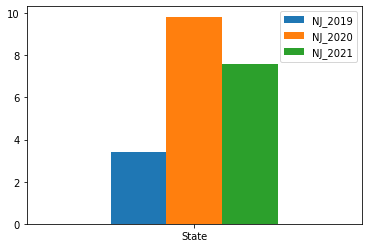

In [48]:
nj_df=pd.DataFrame({'NJ_2019': nj_2019, 'NJ_2020':nj_2020, 'NJ_2021':nj_2021}, index = ["State"]) 
nj_df

ax = nj_df.plot.bar(rot=0)

In [27]:
#Find the mean of NY 2019
ny_2019=[34,
3.9,
3.9,
3.8,
3.8,
3.8,
3.8,
3.8,
3.8,
3.8,
3.7,
3.7       

]
ny_2019= np.mean(ny_2019)
ny_2019


6.316666666666666

In [46]:
te_df=pd.DataFrame({"NJ_2019":nj_2019, "PA_2019":pa_2019, "NY_2019":ny_2019, "NJ_2020":nj_2020, "NY_2020":ny_2020, "PA_2020":pa_2020,
                    "NJ_2021":nj_2021, "PA_2021":pa_2021, "NY_2021":ny_2021}, index=["Unemployment Rate"])
te_df

,NJ_2019,PA_2019,NY_2019,NJ_2020,NY_2020,PA_2020,NJ_2021,PA_2021,NY_2021
Unemployment Rate,3.425,3.8,6.316667,9.833333,9.754545,10.209091,7.58,8.42,8.42


In [51]:
state_df_transposed=state_df.T
state_df_transposed.index.name="Unemployment Rates"
state_df_transposed

,State
Unemployment Rates,
NJ_2019,3.425000
PA_2019,3.800000
NY_2019,6.316667
NJ_2020,9.833333
NY_2020,9.754545
PA_2020,10.209091
NJ_2021,7.580000
NY_2021,8.420000
PA_2021,8.420000


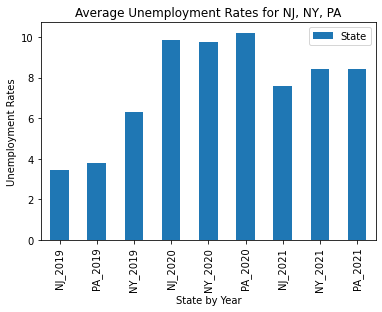

In [52]:
state_df_transposed.plot(kind="bar")
plt.title("Average Unemployment Rates for NJ, NY, PA")
plt.ylabel("Unemployment Rates")
plt.xlabel("State by Year")
plt.show()

In [28]:
#Find the mean of NY 2020
ny_2020=[3.8,
3.9,
3.9,
16.2,
15.7,
15.0,
14.7,
11.7,
10.0,
8.7,
3.7
]
ny_2020=np.mean(ny_2020)
ny_2020

9.754545454545454

In [29]:
#Find the mean of NY 2021
ny_2021=[8.8,
8.9,
8.4,
8.2,
7.8
]
ny_2021=np.mean(ny_2021)
ny_2021

8.419999999999998

In [30]:
k

NameError: name 'k' is not defined

In [31]:
#Find the mean of PA 2019
pa_2019=[3.9,
3.9,
3.8,
3.8,
3.8,
3.8,
3.8,
3.8,
3.8,
3.7,
3.7
]
pa_2019=np.mean(pa_2019)
pa_2019

3.8000000000000003

In [32]:
#Find the mean of PA 2020

pa_2020=[3.8,
3.9,
3.9,
16.2,
15.7,
15.0,
14.7,
11.7,
10.0,
8.7,
8.7
]
pa_2020=np.mean(pa_2020)
pa_2020

10.209090909090909

In [33]:
#Find the mean of PA 2021

pa_2021=[8.8,
8.9,
8.4,
8.2,
7.8,

]
pa_2021=np.mean(pa_2021)
pa_2021

8.419999999999998

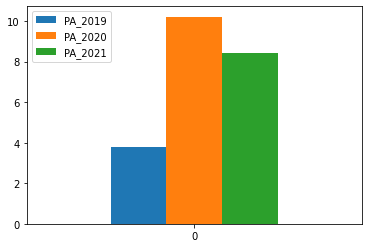

In [34]:
#Plot PA data

pa_df=pd.DataFrame({'PA_2019': pa_2019, 'PA_2020':pa_2020, 'PA_2021':pa_2021}, index = [0]) 
pa_df

ax = pa_df.plot.bar(rot=0)

In [53]:
state_df=pd.DataFrame({'NJ_2019':nj_2019, 'PA_2019':pa_2019, 'NY_2019':ny_2019, 'NJ_2020': nj_2020, 'NY_2020': ny_2020, 
                       'PA_2020': pa_2020, 'NJ_2021':nj_2021, 'NY_2021':ny_2021, 'PA_2021':pa_2021 }, index = ["State"])
state_df

,NJ_2019,PA_2019,NY_2019,NJ_2020,NY_2020,PA_2020,NJ_2021,NY_2021,PA_2021
State,3.425,3.8,6.316667,9.833333,9.754545,10.209091,7.58,8.42,8.42


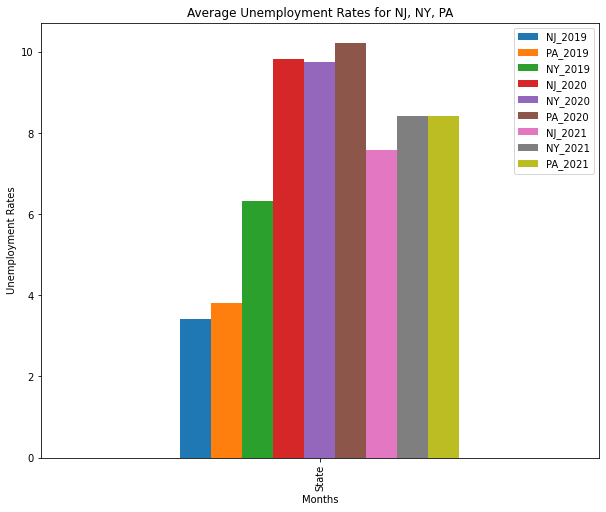

In [54]:
state_df=pd.DataFrame({'NJ_2019':nj_2019, 'PA_2019':pa_2019, 'NY_2019':ny_2019, 'NJ_2020': nj_2020, 'NY_2020': ny_2020, 
                       'PA_2020': pa_2020, 'NJ_2021':nj_2021, 'NY_2021':ny_2021, 'PA_2021':pa_2021 }, index = ["State"])
state_df

state_df.head(10).plot(kind='bar', figsize=(10,8))
plt.title("Average Unemployment Rates for NJ, NY, PA")
plt.ylabel("Unemployment Rates")
plt.xlabel("Months")
#plt.x_axis["Unemployment Rates"]
plt.xticks()
plt.show()

#ax=state_df.plot.bar(rot=0)

# Create bars and choose color
#state_df['NJ_2019', 'PA_2019', 'NY_2019','NJ_2020', 'PA_2020', 'NJ_2021', 'NY_2021', 'PA_2021'].plot(kind="barh")
#plt.title("Average Unemployment Rates for NJ, NY, PA")
#plt.ylabel("States")
#plt.xlabel("Unemployment Rates")
 

Text(0.5, 0, 'Unemployment Rate %')

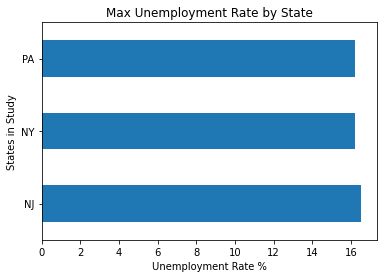

In [38]:
new_df = \
unemployment.sort_values(by = 'Unemployment Rate', ascending=False).groupby(['State']).first()
new_df['Unemployment Rate'].plot(kind="barh")
plt.title("Max Unemployment Rate by State")
plt.ylabel("States in Study")
plt.xlabel("Unemployment Rate %")

In [55]:
NJ["Month"] =\
pd.to_datetime(NJ.Month, format='%B').dt.month.map("{:02}".format)

NameError: name 'NJ' is not defined

In [56]:
NJ["Combined Date"]=NJ["Month"].map(str) + '/'+ NJ["Year"].map(str)

NameError: name 'NJ' is not defined

In [57]:
NJ.plot.line(x ='Combined Date', y = "Unemployment Rate", figsize=(15, 5),color="red")
plt.ticks(rotation=90)
plt.title("NJ Unemployment Rate By Month", fontsize=30, fontweight='bold')
plt.ylabel("Unemployment Rate")
plt.xlabel('')
plt.show()

NameError: name 'NJ' is not defined

In [39]:
#unemployment=[unemployment["State"]=='NJ'].mean()

print(unemployment.describe())

              Year  Unemployment Rate
count    86.000000          86.000000
mean   2019.755814           6.989535
std       0.734623           4.194591
min    2019.000000           3.200000
25%    2019.000000           3.800000
50%    2020.000000           3.900000
75%    2020.000000           8.775000
max    2021.000000          16.500000


In [40]:
x_axis = np.arange(len(unemployment))
tick_locations = [value+0.4 for value in x_axis]

([<matplotlib.axis.XTick at 0x27486075860>,
 [Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'PA'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY'),
  Text(0, 0, 'NY

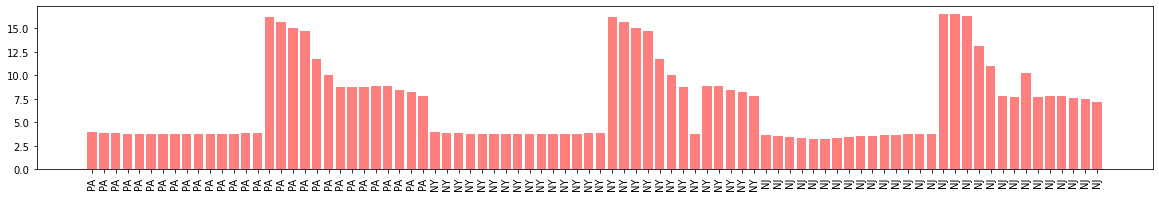

In [41]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, unemployment["Unemployment Rate"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, unemployment["State"], rotation="vertical")